### Imports

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime
from sklearn.decomposition import LatentDirichletAllocation

### Reading in the data

In [2]:
data = pd.read_csv("verb_object_df.csv", index_col=0)

In [3]:
data.head()

,tegema,saama,tundma,andma,sõlmima,teadma,maksma,pidama,võtma,pöörama,...,mountima,uvitama,nattima,sailitama,võrdlustama,nendevastuma,postima,väärindama,hapustama,inhibeerima
see,69534,9208,2789,6079,288,13465,2402,12953,12901,273,...,0,0,3,0,0,0,0,0,0,0
mis,46616,7582,3492,7881,834,5235,3286,8315,8511,116,...,0,0,0,0,0,0,0,0,0,0
tema,3881,2438,3037,1798,82,1208,285,4119,5879,98,...,0,0,0,0,3,0,0,0,0,0
ise,1552,374,20326,1257,5,216,279,6065,2645,430,...,0,0,0,0,0,0,0,0,0,0
miski,22786,4216,571,2191,16,9647,1595,315,6522,29,...,0,0,0,0,0,0,0,0,0,0


### Optimizing LDA

In [5]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

models = {}
perplexities = {}

for n in range(100, 1001, 100):
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

23:47:02.779891
Model with 100 topics fitted and perplexity found at 23:48:32.933285.
Model with 200 topics fitted and perplexity found at 23:50:32.859370.
Model with 300 topics fitted and perplexity found at 23:53:04.521595.
Model with 400 topics fitted and perplexity found at 23:56:32.802679.
Model with 500 topics fitted and perplexity found at 0:00:35.742822.
Model with 600 topics fitted and perplexity found at 0:05:10.013479.
Model with 700 topics fitted and perplexity found at 0:10:18.176734.
Model with 800 topics fitted and perplexity found at 0:17:17.351151.
Model with 900 topics fitted and perplexity found at 0:25:19.170283.
Model with 1000 topics fitted and perplexity found at 0:33:41.240570.
0:33:41.240570
0:46:38.460679


In [6]:
perplexities

{100: 71.03219286238806,
 200: 62.209478688301175,
 300: 59.57807534279889,
 400: 57.977880730026556,
 500: 57.09906603952504,
 600: 56.65517192861018,
 700: 56.47703794722879,
 800: 56.194801614725996,
 900: 56.13764836286705,
 1000: 56.14997773851935}

In [7]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Perplexity')

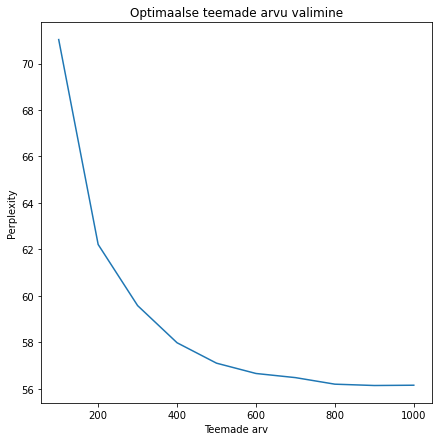

In [8]:
plt.figure(figsize=(7, 7))

plt.plot(list(range(100, 1001, 100)), perplexities.values())

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")

In [9]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

for n in [750, 850, 950]:
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
    
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

0:34:57.332016
Model with 750 topics fitted and perplexity found at 0:41:24.186522.
Model with 850 topics fitted and perplexity found at 0:48:27.616371.
Model with 950 topics fitted and perplexity found at 0:56:17.272071.
0:56:17.273071
0:21:19.941054


In [10]:
perplexities

{100: 71.03219286238806,
 200: 62.209478688301175,
 300: 59.57807534279889,
 400: 57.977880730026556,
 500: 57.09906603952504,
 600: 56.65517192861018,
 700: 56.47703794722879,
 800: 56.194801614725996,
 900: 56.13764836286705,
 1000: 56.14997773851935,
 750: 56.32899749297647,
 850: 56.1444186860542,
 950: 56.17935938082942}

Text(0, 0.5, 'Perplexity')

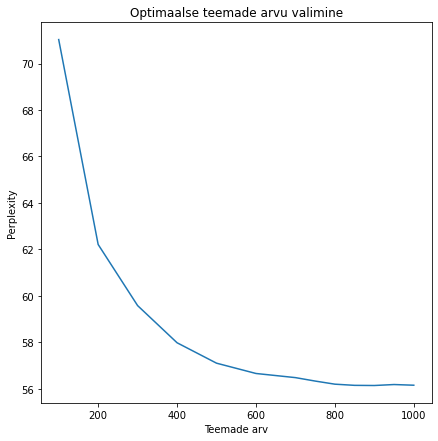

In [11]:
plt.figure(figsize=(7, 7))

keys = [100, 200, 300, 400, 500, 600, 700, 750, 800, 850, 900, 950, 1000]

plt.plot(keys, [perplexities[key] for key in keys])

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")